# Predict TripAdvisor Rating
## In this competition we have to predict the rating of the restaurant on TripAdvisor
**Along the way:**
* Improve pandas skills
* Learn how to work with Kaggle Notebooks
* Understand the data preprocessing
* Learn to work with missing data (Nan)
* Gain experience in feature encoding techniques
* Try feature engineering 
* Make first steps in ML   



*Baseline Notebook is used for creating this solution.

# Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import re
from datetime import datetime
# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# always fix RANDOM_SEED so that your experiments are reproducible!
RANDOM_SEED = 42

In [3]:
# fix the version of the packages so that the experiments are reproducible:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# we combine the train and the test into one dataset for correct processing of features
df_train['sample'] = 1 # mark train dataset
df_test['sample'] = 0 # mark test dataset
df_test['Rating'] = 0 # we do not have a Rating value in the test dataset, we must predict it, so for now we just fill it with zeros


data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Features:
* City 
* Cuisine Style
* Ranking
* Price Range
* Number of Reviews
* Reviews: 2 most recent reviews and the dates of those reviews
* URL_TA: restaurant web page on 'www.tripadvisor.com' 
* ID_TA: restaurant ID on TripAdvisor
* Rating

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
3429,id_3429,Milan,['Pizza'],1580.0,$,131.0,"[['THE REAL NAPOLETANA PIZZA', 'Super good, su...",/Restaurant_Review-g187849-d5617387-Reviews-La...,d5617387,0,0.0
19216,id_3817,Berlin,NaN,3819.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d10487425-Reviews-R...,d10487425,1,4.5
36165,id_915,Krakow,['Mediterranean'],916.0,NaN,10.0,"[['The best place !', 'You should see it'], ['...",/Restaurant_Review-g274772-d3598456-Reviews-Bu...,d3598456,1,4.0
30732,id_1423,Madrid,['American'],1425.0,$$ - $$$,59.0,"[[], []]",/Restaurant_Review-g187514-d11711147-Reviews-3...,d11711147,1,4.0
27014,id_5260,Rome,NaN,5262.0,NaN,4.0,"[['Wonderful butcher'], ['07/22/2017']]",/Restaurant_Review-g187791-d12094323-Reviews-D...,d12094323,1,5.0


In [14]:
# df_train has missing values in: 'Cuisine Style', 'Price Range', 'Number of Reviews'
# df_test has missing values in: 'Cuisine Style', 'Price Range', 'Number of Reviews', 'Reviews'

# Cleaning and Prepping Data  
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

In [15]:
# we convert the column headings to lowercase with an underscore as a word separator
data.columns = ['restaurant_id', 'city', 'cuisine_style', 'ranking',
                'price_range', 'number_of_reviews', 'reviews', 'url_ta',
                'id_ta', 'sample', 'rating']
data.sample(3)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating
25785,id_2699,Milan,NaN,2701.0,NaN,70.0,"[['PLEASE, STAY AWAY!', 'Lovely food'], ['04/1...",/Restaurant_Review-g187849-d4751464-Reviews-De...,d4751464,1,4.0
34401,id_2691,Hamburg,NaN,2699.0,NaN,2.0,"[[""Doesn't exist anymore...""], ['05/09/2013']]",/Restaurant_Review-g187331-d1356236-Reviews-Di...,d1356236,1,2.0
23041,id_5205,Barcelona,NaN,5206.0,NaN,9.0,"[['Affordable, Value For Money, Plenty of Cho....",/Restaurant_Review-g187497-d9846497-Reviews-Ma...,d9846497,1,4.0


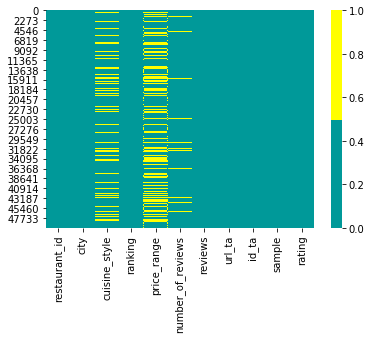

In [16]:
# use a heat map to estimate the amount of missing values
# define colors
# yellow - missing data, blue - not missing
colours = ['#009999', '#ffff00'] 
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

## 1. NAN processing
The presence of missing values can have various reasons, but the NAN values must either be filled in or excluded from the dataset completely. But we have to be careful with NANs, even the absence of information can be an important feature!
So before NAN processing it would be better to take out information about the presence of NAN value as a separate feature.

In [17]:
# determine the number of NAN values to work with
data.isnull().sum()

restaurant_id            0
city                     0
cuisine_style        11590
ranking                  0
price_range          17361
number_of_reviews     3200
reviews                  2
url_ta                   0
id_ta                    0
sample                   0
rating                   0
dtype: int64

In [18]:
# create flags for records with no information
data['number_of_reviews_isnan'] = pd.isna(data['number_of_reviews']).astype('uint8')
data['reviews_isnan'] = pd.isna(data['reviews']).astype('uint8')
data['cuisine_style_isnan'] = pd.isna(data['cuisine_style']).astype('uint8')
data['price_range_isnan'] = pd.isna(data['price_range']).astype('uint8')

data['reviews'] = data['reviews'].fillna('[[], []]')
data['reviews_isnan'] = (data['reviews'] == '[[], []]').astype('float64')


In [19]:
data.isnull().sum()

restaurant_id                  0
city                           0
cuisine_style              11590
ranking                        0
price_range                17361
number_of_reviews           3200
reviews                        0
url_ta                         0
id_ta                          0
sample                         0
rating                         0
number_of_reviews_isnan        0
reviews_isnan                  0
cuisine_style_isnan            0
price_range_isnan              0
dtype: int64

In [20]:
data['number_of_reviews_isnan'].value_counts()

0    46800
1     3200
Name: number_of_reviews_isnan, dtype: int64

In [21]:
# then fill in missing values with 0
data['number_of_reviews'].fillna(0, inplace=True)

In [22]:
data['number_of_reviews'].isna().value_counts()

False    50000
Name: number_of_reviews, dtype: int64

#### "Price Range"

In [23]:
data['price_range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

'Price Range' is the prices in the restaurant.
They can be put in ascending order (so this is not a categorical feature). And this means that they can be replaced by consecutive numbers, for example 1,2,3.

In [24]:
# the median is the same in all cities, the gaps can be filled with the median value
data.groupby(['city'])['price_range'].agg(pd.Series.mode).value_counts()

$$ - $$$    31
Name: price_range, dtype: int64

In [25]:
# replace '$, $$-$$$, $$$$' with numeric features

price_range_dict = {
    '$': 1,
    '$$ - $$$': 2,
    '$$$$': 3,
}

data['price_range'].replace(price_range_dict, inplace=True)

In [26]:
# fill in the missing values with the median of the sample
data['price_range'] = data['price_range'].fillna(data.groupby('city')['price_range'].transform('median'))

In [27]:
data.head(5)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,number_of_reviews_isnan,reviews_isnan,cuisine_style_isnan,price_range_isnan
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,1.0,0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0.0,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0.0,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0.0,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0.0,0,0


#### "Cuisine Style"

In [28]:
# fill missing values with category Other
data['cuisine_style'] = data['cuisine_style'].fillna("['Other']")

In [29]:
data['cuisine_style'].value_counts()

['Other']                                                                                               11590
['Italian']                                                                                              1332
['French']                                                                                               1019
['Spanish']                                                                                               860
['French', 'European']                                                                                    503
                                                                                                        ...  
['Bar', 'British', 'Pub', 'Cafe', 'Gastropub', 'Vegan Options', 'Gluten Free Options']                      1
['Brew Pub', 'Cafe', 'International', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']        1
['Sushi', 'Spanish', 'European', 'Vegetarian Friendly']                                                     1
['Bar', 'P

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
restaurant_id              50000 non-null object
city                       50000 non-null object
cuisine_style              50000 non-null object
ranking                    50000 non-null float64
price_range                50000 non-null float64
number_of_reviews          50000 non-null float64
reviews                    50000 non-null object
url_ta                     50000 non-null object
id_ta                      50000 non-null object
sample                     50000 non-null int64
rating                     50000 non-null float64
number_of_reviews_isnan    50000 non-null uint8
reviews_isnan              50000 non-null float64
cuisine_style_isnan        50000 non-null uint8
price_range_isnan          50000 non-null uint8
dtypes: float64(5), int64(1), object(6), uint8(3)
memory usage: 4.7+ MB


### 2. Feature processing


In [31]:
# let's see what features are categorical
data.nunique(dropna=False)

restaurant_id              13094
city                          31
cuisine_style              10732
ranking                    12975
price_range                    3
number_of_reviews           1574
reviews                    41857
url_ta                     49963
id_ta                      49963
sample                         2
rating                        10
number_of_reviews_isnan        2
reviews_isnan                  2
cuisine_style_isnan            2
price_range_isnan              2
dtype: int64

In [32]:
# determine what type of data in each of the columns of the dataset belongs to

for column in data.columns:
    print(column, type(data[column][0]))

restaurant_id <class 'str'>
city <class 'str'>
cuisine_style <class 'str'>
ranking <class 'numpy.float64'>
price_range <class 'numpy.float64'>
number_of_reviews <class 'numpy.float64'>
reviews <class 'str'>
url_ta <class 'str'>
id_ta <class 'str'>
sample <class 'numpy.int64'>
rating <class 'numpy.float64'>
number_of_reviews_isnan <class 'numpy.uint8'>
reviews_isnan <class 'numpy.float64'>
cuisine_style_isnan <class 'numpy.uint8'>
price_range_isnan <class 'numpy.uint8'>


In [33]:
for col in ['city', 'cuisine_style', 'reviews', 'url_ta', 'id_ta']:
    display(data[col].describe())

count      50000
unique        31
top       London
freq        7193
Name: city, dtype: object

count         50000
unique        10732
top       ['Other']
freq          11590
Name: cuisine_style, dtype: object

count        50000
unique       41857
top       [[], []]
freq          8114
Name: reviews, dtype: object

count                                                 50000
unique                                                49963
top       /Restaurant_Review-g187514-d9877640-Reviews-Ra...
freq                                                      2
Name: url_ta, dtype: object

count        50000
unique       49963
top       d7809594
freq             2
Name: id_ta, dtype: object

#### "City"

In [34]:
# firstly we make a copy of the 'city' column - it will be useful to us later
data['city_copy'] = data['city']
# pandas has a function for One-Hot Encoding - get_dummies
amount_of_cities = len(data['city'].unique())
data = pd.get_dummies(data, columns=['city'], prefix='', prefix_sep='',dummy_na=False)
city_sum = {}
for city in data.columns[-amount_of_cities:]:
    city_sum[city] = data[city].sum()
print("количество ресторанов по городам:", city_sum)

количество ресторанов по городам: {'Amsterdam': 1372, 'Athens': 776, 'Barcelona': 3395, 'Berlin': 2705, 'Bratislava': 380, 'Brussels': 1314, 'Budapest': 1021, 'Copenhagen': 819, 'Dublin': 836, 'Edinburgh': 745, 'Geneva': 590, 'Hamburg': 1186, 'Helsinki': 475, 'Krakow': 554, 'Lisbon': 1647, 'Ljubljana': 222, 'London': 7193, 'Luxembourg': 263, 'Lyon': 1126, 'Madrid': 3813, 'Milan': 2694, 'Munich': 1145, 'Oporto': 642, 'Oslo': 488, 'Paris': 6108, 'Prague': 1816, 'Rome': 2589, 'Stockholm': 1033, 'Vienna': 1443, 'Warsaw': 925, 'Zurich': 685}


In [35]:
data.head(5)

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,id_0,"['Bar', 'Pub']",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data.sample(5)

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
1547,id_1547,"['Bar', 'Pub', 'European']",1399.0,2.0,14.0,"[['An iconic bar at the Amsterdam Hilton', 'Gr...",/Restaurant_Review-g188590-d10779831-Reviews-H...,d10779831,0,0.0,...,0,0,0,0,0,0,0,0,0,0
16293,id_247,"['French', 'Sushi', 'European', 'Asian', 'Vege...",248.0,2.0,115.0,"[['Lunch', 'Nice place for corporate events'],...",/Restaurant_Review-g190356-d2704699-Reviews-Do...,d2704699,1,4.0,...,0,0,0,0,0,0,0,0,0,0
26312,id_1515,"['Japanese', 'Sushi']",1518.0,2.0,12.0,"[['Nice place, need to book in advance', 'Best...",/Restaurant_Review-g274707-d12402437-Reviews-R...,d12402437,1,4.0,...,0,0,0,0,1,0,0,0,0,0
17608,id_10473,['Japanese'],10475.0,1.0,47.0,"[['Bentos just like in Japan!', 'Excellent ben...",/Restaurant_Review-g187147-d3620125-Reviews-Ha...,d3620125,1,4.0,...,0,0,0,1,0,0,0,0,0,0
41515,id_788,['Other'],789.0,2.0,3.0,"[[], []]",/Restaurant_Review-g189934-d1204006-Reviews-Ra...,d1204006,1,4.0,...,0,0,0,0,0,0,0,0,0,0


#### "Cuisine Style"

In [37]:
# get from rows in Cuisine Style column - lists
data['cuisine_style'] = data['cuisine_style'].apply(lambda x: eval(x))

In [38]:
# add a feature with the number of types of kitchens
data['len_cuisines'] = data['cuisine_style'].apply(lambda x: len(x))
data['len_cuisines']

0        2
1        5
2        1
3        5
4        6
        ..
49995    4
49996    5
49997    2
49998    5
49999    1
Name: len_cuisines, Length: 50000, dtype: int64

In [39]:
data2 = data.copy()
# add dummy variables for kitchen types
style = data['cuisine_style'].explode()
X = pd.get_dummies(style)
index_list = pd.Index.tolist(X.index)
Y = X.groupby(index_list).sum()
data2 = data2.join(Y)

In [40]:
# get a list of all kitchens
cuisine_list = np.sort(data.cuisine_style.explode().unique())
cuisine_list

array(['Afghani', 'African', 'Albanian', 'American', 'Arabic',
       'Argentinean', 'Armenian', 'Asian', 'Australian', 'Austrian',
       'Azerbaijani', 'Balti', 'Bangladeshi', 'Bar', 'Barbecue',
       'Belgian', 'Brazilian', 'Brew Pub', 'British', 'Burmese', 'Cafe',
       'Cajun & Creole', 'Cambodian', 'Canadian', 'Caribbean',
       'Caucasian', 'Central American', 'Central Asian',
       'Central European', 'Chilean', 'Chinese', 'Colombian',
       'Contemporary', 'Croatian', 'Cuban', 'Czech', 'Danish',
       'Delicatessen', 'Diner', 'Dutch', 'Eastern European', 'Ecuadorean',
       'Egyptian', 'Ethiopian', 'European', 'Fast Food', 'Filipino',
       'French', 'Fujian', 'Fusion', 'Gastropub', 'Georgian', 'German',
       'Gluten Free Options', 'Greek', 'Grill', 'Halal', 'Hawaiian',
       'Healthy', 'Hungarian', 'Indian', 'Indonesian', 'International',
       'Irish', 'Israeli', 'Italian', 'Jamaican', 'Japanese', 'Korean',
       'Kosher', 'Latin', 'Latvian', 'Lebanese', 'Malays

In [41]:

cuisine_count = data2[['Afghani', 'African', 'Albanian', 'American', 'Arabic',
       'Argentinean', 'Armenian', 'Asian', 'Australian', 'Austrian',
       'Azerbaijani', 'Balti', 'Bangladeshi', 'Bar', 'Barbecue',
       'Belgian', 'Brazilian', 'Brew Pub', 'British', 'Burmese', 'Cafe',
       'Cajun & Creole', 'Cambodian', 'Canadian', 'Caribbean',
       'Caucasian', 'Central American', 'Central Asian',
       'Central European', 'Chilean', 'Chinese', 'Colombian',
       'Contemporary', 'Croatian', 'Cuban', 'Czech', 'Danish',
       'Delicatessen', 'Diner', 'Dutch', 'Eastern European', 'Ecuadorean',
       'Egyptian', 'Ethiopian', 'European', 'Fast Food', 'Filipino',
       'French', 'Fujian', 'Fusion', 'Gastropub', 'Georgian', 'German',
       'Gluten Free Options', 'Greek', 'Grill', 'Halal', 'Hawaiian',
       'Healthy', 'Hungarian', 'Indian', 'Indonesian', 'International',
       'Irish', 'Israeli', 'Italian', 'Jamaican', 'Japanese', 'Korean',
       'Kosher', 'Latin', 'Latvian', 'Lebanese', 'Malaysian',
       'Mediterranean', 'Mexican', 'Middle Eastern', 'Minority Chinese',
       'Mongolian', 'Moroccan', 'Native American', 'Nepali',
       'New Zealand', 'Norwegian', 'Other', 'Pakistani', 'Persian',
       'Peruvian', 'Pizza', 'Polish', 'Polynesian', 'Portuguese', 'Pub',
       'Romanian', 'Russian', 'Salvadoran', 'Scandinavian', 'Scottish',
       'Seafood', 'Singaporean', 'Slovenian', 'Soups', 'South American',
       'Southwestern', 'Spanish', 'Sri Lankan', 'Steakhouse',
       'Street Food', 'Sushi', 'Swedish', 'Swiss', 'Taiwanese', 'Thai',
       'Tibetan', 'Tunisian', 'Turkish', 'Ukrainian', 'Uzbek',
       'Vegan Options', 'Vegetarian Friendly', 'Venezuelan', 'Vietnamese',
       'Welsh', 'Wine Bar', 'Xinjiang', 'Yunnan']].sum()
cuisine_count.sort_values(ascending=False)[0:10]

Vegetarian Friendly    14021
European               12561
Other                  11590
Mediterranean           7820
Italian                 7433
Vegan Options           5684
Gluten Free Options     5185
Bar                     4094
French                  3970
Asian                   3786
dtype: int64

In [42]:
# create 2 new features by kitchen groups
data['cuisine_style_1'] = data2['European'] + data2['Vegetarian Friendly']
data['cuisine_style_2'] = data2['Italian'] + data2['Mediterranean'] + data2['Other']

#### "Reviews"

In [43]:
# convert date columns to datetime format
# let's take columns with the most recent reviews and with "review frequency" - the difference in dates between reviews

pattern = re.compile('\d\d/\d\d/\d\d\d\d')
data['reviews'] = data['reviews'].fillna('')
data['review_dates'] = data['reviews'].apply(lambda x: pattern.findall(x))
data['review_1'] = data['review_dates'].apply(lambda x: x[:1])
data['review_2'] = data['review_dates'].apply(lambda x: x[1:])

In [44]:
# fill in the NANs with the most common value for each review column
for i in range(len(data['review_1'])):
    if len(data['review_1'][i]) == 0:
        data['review_1'][i].append('01/07/2018')
for i in range(len(data['review_2'])):
    if len(data['review_2'][i]) == 0:
        data['review_2'][i].append('01/03/2018')

In [45]:
# convert to datetime format
data['review_1'] = data['review_1'].apply(
                   lambda x: datetime.strptime(x[0], '%m/%d/%Y'))
data['review_2'] = data['review_2'].apply(
                   lambda x: datetime.strptime(x[0], '%m/%d/%Y'))
data.drop(['review_dates'], axis=1, inplace=True)

In [46]:
# create a new feature 'review_update' with a difference in days between reviews
data['review_update'] = data['review_1'] - data['review_2']
data['review_update'] = data['review_update'].apply(lambda x: x.days)

In [47]:
# create a new feature 'last_review'
# highlight the most recent reviews
new_review = data['review_1'].max()
data['new_review'] = data['review_1'].apply(
                         lambda x: (new_review - x).days)

In [48]:
# population of cities according to wikipedia.org
city_pop_dict = {
    'Paris': 2187526,
    'Stockholm': 975551,
    'London': 8982000,
    'Berlin': 3769000,
    'Munich': 1472000,
    'Oporto': 214349,
    'Milan': 1352000,
    'Bratislava': 424428,
    'Vienna': 1897000,
    'Rome': 2873000,
    'Barcelona': 5575000,
    'Madrid': 6642000,
    'Dublin': 1388000,
    'Brussels': 174383,
    'Zurich': 402762,
    'Warsaw': 1708000,
    'Budapest': 1752000,
    'Copenhagen': 602481,
    'Amsterdam': 821752,
    'Lyon': 513275,
    'Hamburg': 1845000,
    'Lisbon': 504718,
    'Prague': 1309000,
    'Oslo': 681067,
    'Helsinki': 631695,
    'Edinburgh': 482005,
    'Geneva': 499480,
    'Ljubljana': 279631,
    'Athens': 664046,
    'Luxembourg': 124528,
    'Krakow': 762508
}

In [49]:
 data['population'] = data['city_copy'].map(city_pop_dict)

In [50]:
# create feature 'Review to Population' - the ratio of the number of reviews to the population:
data['review_to_population'] = data['number_of_reviews'] / data['population']

In [51]:
# create the feature 'Relative_Ranking' - rank relative to the number of restaurants in this city:
def rel_rank(row, c_s):
    #функция деления ранга ресторана на количество ресторанов
    # в городе по данным датасета
    for i in c_s.keys():
        if row[i] == 1:
            res = row['ranking']/c_s[i]
    return res

data['relative_ranking'] = data.apply(lambda x: rel_rank(x, city_sum), axis=1)

In [52]:
# create feature 'Rel_Rank to Population' - ratio of relative rank to population:
data['rel_rank_to_population'] = data['relative_ranking'] / data['population']

### Feature distribution

#### "Ranking"

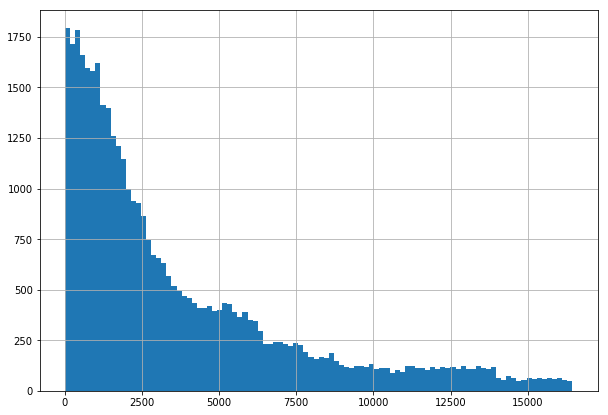

In [53]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

We have many restaurants that do not even reach 2500 places in their city, but what about the cities?

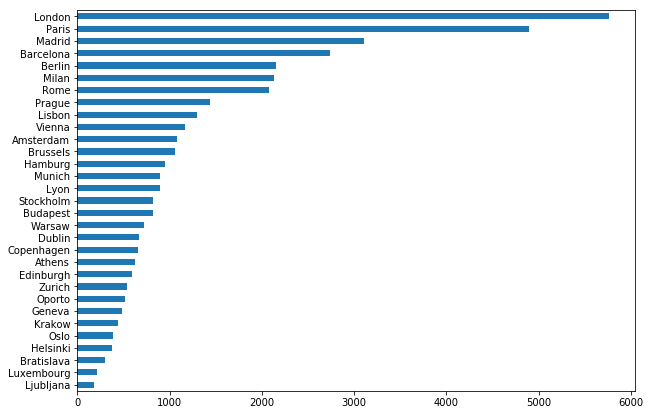

In [54]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

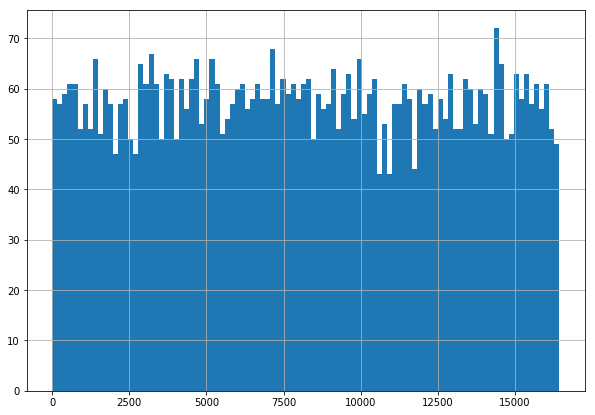

In [55]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

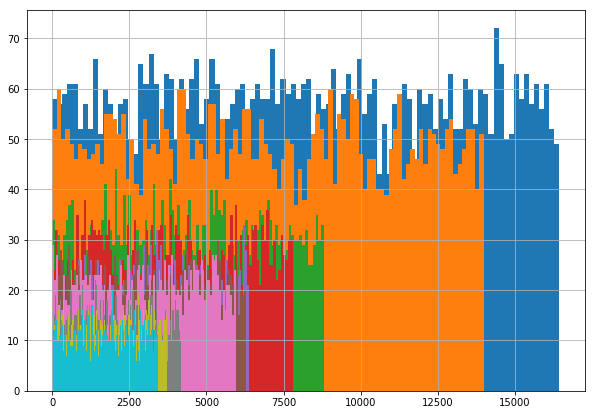

In [56]:
# Let's look at the top 10 cities
# The plot clearly shows that Ranking directly depends on the number of restaurants in the city
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

In [57]:
# check the distribution of the feature Ranking
# function for calculating and visualizing outlier boundaries
# displays calculated parameters of quantiles and distribution histograms and boxplot
def show_IQR(pd_dataset, column_name, bins_n=10):
    data_column = pd_dataset[column_name]
    perc_25 = data_column.quantile(0.25, interpolation="midpoint")
    perc_75 = data_column.quantile(0.75, interpolation="midpoint")
    IQR = perc_75 - perc_25
    print(f'Q1: {perc_25}\nQ3: {perc_75}\nIQR: {IQR}',
          f'\nГраница выбросов: [{perc_25 - 1.5*IQR}, {perc_75 + 1.5*IQR}]')
    # гистограмма распределения: 
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    sns.distplot(data_column.values, bins=bins_n, color='#50248f')
    plt.title(column_name + ' Distribution\n', fontsize=15)
    plt.xlabel(column_name)
    plt.ylabel('Quantity (frequency)')

    # boxplot: 
    plt.subplot(122)
    sns.boxplot(data_column.values, color='#38d1ff')
    plt.title(column_name + ' Distribution\n', fontsize=15)
    plt.xlabel(column_name)
    return 0

Q1: 972.0
Q3: 5241.0
IQR: 4269.0 
Граница выбросов: [-5431.5, 11644.5]


0

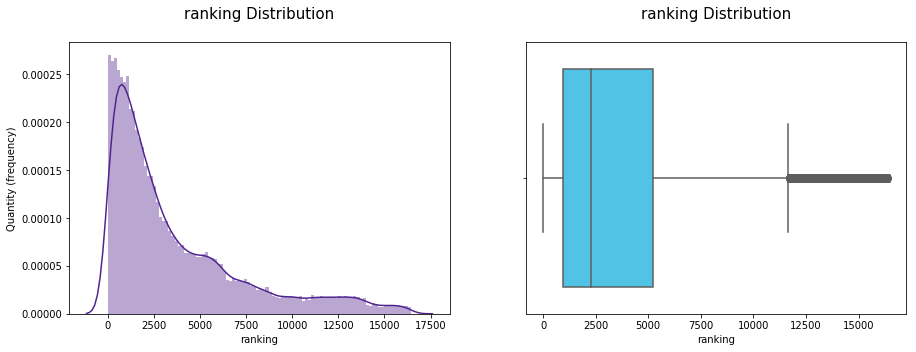

In [58]:
show_IQR(data, "ranking", 100)

In [59]:
# Lower number - higher rank. It is distributed among the restaurants in the city.
# so every city has a restaurant with the highest ranking, but not every city with a higher number

In [60]:
# create a copy of the 'ranking' feature
data['ranking_copy'] = data['ranking'].copy()

# normalize "ranking" relative to the maximum value in the dataset
data['ranking'] = data.groupby(
    'city_copy')['ranking'].apply(lambda x: x/x.max())

In [61]:
# add variables with the average, maximum and minimum ranks of the restaurant in the city
ranking_mean_per_city = data.groupby('city_copy')['ranking'].mean()
data['rating_mean_per_city'] = data.city_copy.map(ranking_mean_per_city)
rank_city_min = data.groupby(['city_copy'])['ranking'].min().to_dict()
rank_city_max = data.groupby(['city_copy'])['ranking'].max().to_dict()
data['rank_city_min'] = data.city_copy.map(rank_city_min)
data['rank_city_max'] = data.city_copy.map(rank_city_max)
data['rank_norm'] = data.apply(lambda x: (
    x['ranking'] - x['rank_city_min'])/(x['rank_city_max'] - \
                                        x['rank_city_min']), axis=1)

### Let's look at the distribution of the target variable

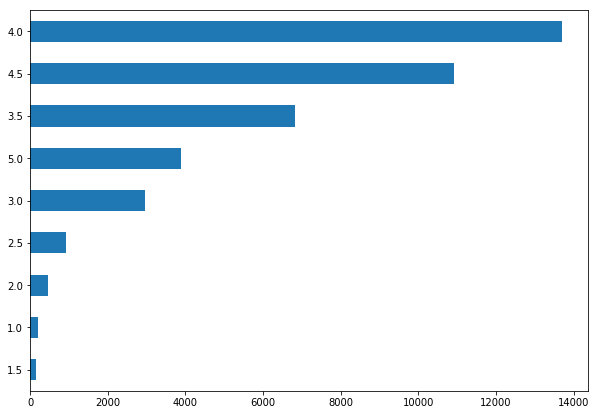

In [62]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Let's look at the distribution of the target variable relative to the feature

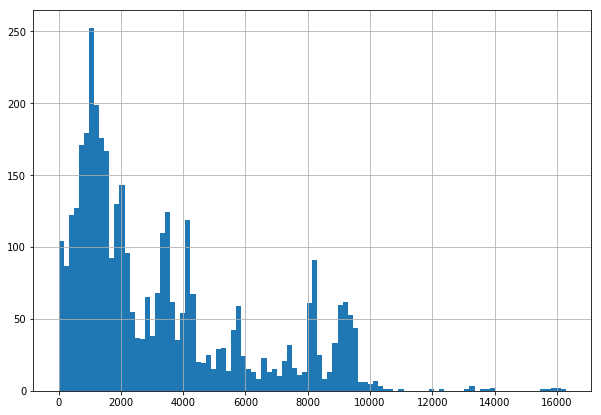

In [63]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

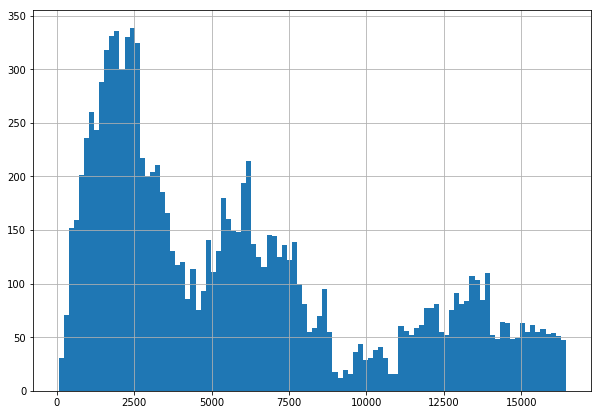

In [64]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### Feature correlation

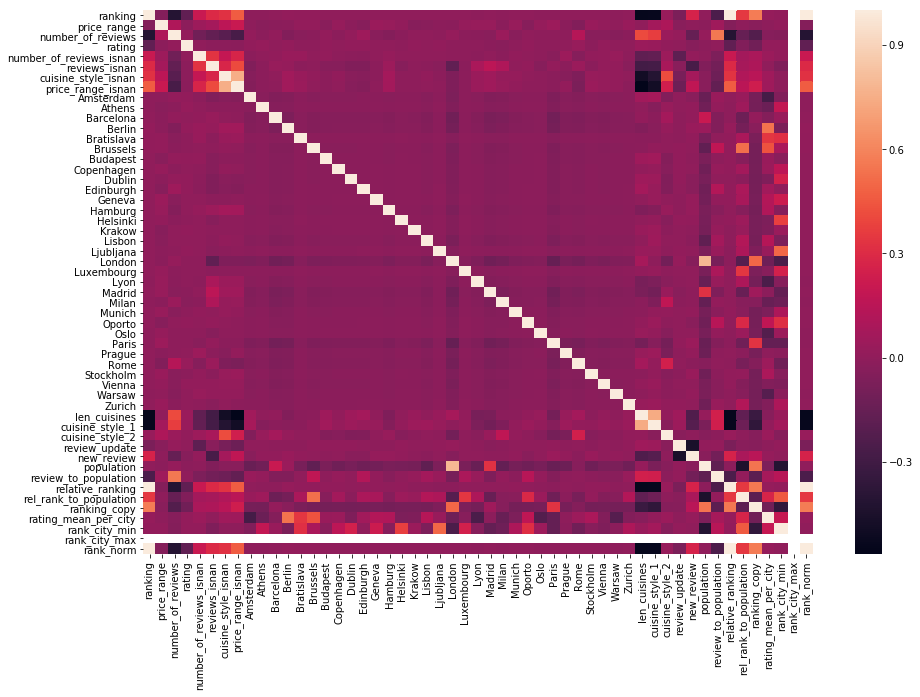

In [65]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# Data Preprocessing
Now, for convenience and reproducibility of the code, we do all the processing in one big function

In [66]:
df_preproc = data.copy()

# remove features that have not yet been processed
# model on features with dtypes "object" will not be trained
# just select them and drop them
object_columns = [
    s for s in df_preproc.columns if df_preproc[s].dtypes == 'object']
df_preproc.drop(object_columns, axis=1, inplace=True)

df_preproc.drop(['review_1', 'review_2'], axis = 1, inplace=True)

pd.set_option('display.max_rows', 200) # показывать больше строк
pd.set_option('display.max_columns', 200) # показывать больше колонок
df_preproc.head(3)

,ranking,price_range,number_of_reviews,sample,rating,number_of_reviews_isnan,reviews_isnan,cuisine_style_isnan,price_range_isnan,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,len_cuisines,cuisine_style_1,cuisine_style_2,review_update,new_review,population,review_to_population,relative_ranking,rel_rank_to_population,ranking_copy,rating_mean_per_city,rank_city_min,rank_city_max,rank_norm
0,0.926855,2.0,4.0,0,0.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,4,50,2187526,0.000002,2.122299,9.701821e-07,12963.0,0.496107,0.000215,1.0,0.926840
1,0.092901,2.0,97.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,0,37,83,631695,0.000154,0.223158,3.532684e-07,106.0,0.494506,0.003506,1.0,0.089710
2,0.458664,2.0,28.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,22,60,482005,0.000058,1.087248,2.255679e-06,810.0,0.501206,0.000566,1.0,0.458357


#### Run and check what happened

In [67]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
ranking                    50000 non-null float64
price_range                50000 non-null float64
number_of_reviews          50000 non-null float64
sample                     50000 non-null int64
rating                     50000 non-null float64
number_of_reviews_isnan    50000 non-null uint8
reviews_isnan              50000 non-null float64
cuisine_style_isnan        50000 non-null uint8
price_range_isnan          50000 non-null uint8
Amsterdam                  50000 non-null uint8
Athens                     50000 non-null uint8
Barcelona                  50000 non-null uint8
Berlin                     50000 non-null uint8
Bratislava                 50000 non-null uint8
Brussels                   50000 non-null uint8
Budapest                   50000 non-null uint8
Copenhagen                 50000 non-null uint8
Dublin                     50000 non-null uint8
Edinburgh        

In [68]:
# now select the test part
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

**Before sending our data for training, let's split the data into one more test and train for validation.
This will help us check how well our model is performing before submitting a submission to kaggle.**

In [69]:
# use the special train_test_split function to split the test data
# select 20% of the data for validation (parameter test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [70]:
# checking
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 53), (40000, 53), (40000, 52), (32000, 52), (8000, 52))

# Model

In [71]:
# import the necessary libraries:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [72]:
# create a model
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [73]:
# train the model on the test dataset
model.fit(X_train, y_train)

# we use the trained model to predict the rating of restaurants in the test set
# the predicted values are written to the y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [74]:
# rating rounding up to 0.5
y_pred = (y_pred*2).round()/2
y_pred

array([4.5, 5. , 4.5, ..., 4.5, 4. , 4. ])

In [75]:
# compare the predicted values (y_pred) with the real ones (y_test), and see how they differ on average
# the metric is called Mean Absolute Error (MAE) and shows the average deviation of the predicted values from the actual ones
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1691875


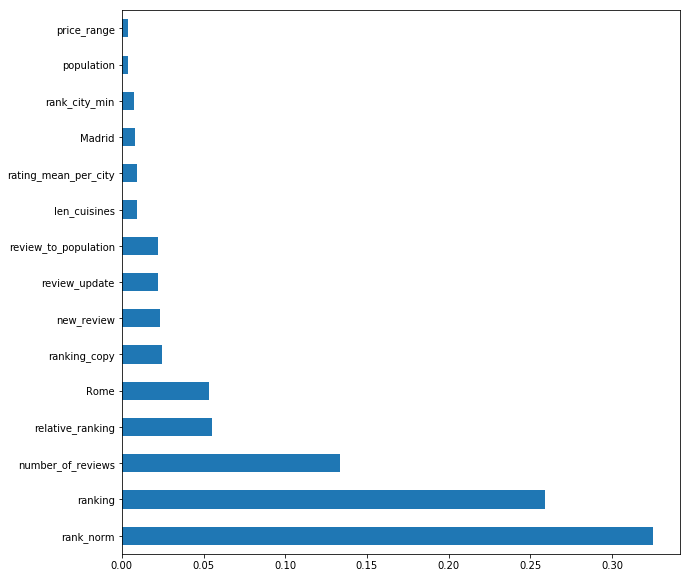

In [76]:
# in RandomForestRegressor it is possible to display the most important features for the model
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission

In [77]:
test_data.sample(10)

,ranking,price_range,number_of_reviews,rating,number_of_reviews_isnan,reviews_isnan,cuisine_style_isnan,price_range_isnan,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,len_cuisines,cuisine_style_1,cuisine_style_2,review_update,new_review,population,review_to_population,relative_ranking,rel_rank_to_population,ranking_copy,rating_mean_per_city,rank_city_min,rank_city_max,rank_norm
5230,0.512298,2.0,18.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,-339,393,2187526,8.228474e-06,1.173052,5.362458e-07,7165.0,0.496107,0.000215,1.0,0.512193
2179,0.895936,2.0,8.0,0.0,0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,4,50,1352000,5.917160e-06,2.086860,1.543535e-06,5622.0,0.494985,0.000159,1.0,0.895920
7574,0.344947,2.0,33.0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,-187,399,3769000,8.755638e-06,0.812569,2.155928e-07,2198.0,0.510894,0.000314,1.0,0.344741
4760,0.708184,2.0,4.0,0.0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,50,5575000,7.174888e-07,1.626215,2.916978e-07,5521.0,0.497617,0.000641,1.0,0.707996
151,0.034903,2.0,468.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,2,0,36,105,975551,4.797289e-04,0.083253,8.533912e-08,86.0,0.502225,0.000406,1.0,0.034511
7731,0.980974,2.0,2.0,0.0,0,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,50,664046,3.011840e-06,2.259021,3.401904e-06,1753.0,0.492565,0.001679,1.0,0.980942
5279,0.588208,2.0,2.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,13,129,1708000,1.170960e-06,1.369730,8.019495e-07,1267.0,0.489876,0.000464,1.0,0.588017
1363,0.857377,2.0,14.0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,-98,268,1752000,7.990868e-06,2.048972,1.169504e-06,2092.0,0.499615,0.000410,1.0,0.857319
9350,0.594523,2.0,0.0,0.0,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,-55,109,2187526,0.000000e+00,1.361329,6.223146e-07,8315.0,0.496107,0.000215,1.0,0.594436
4498,0.250653,2.0,19.0,0.0,0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,4,50,6642000,2.860584e-06,0.579072,8.718332e-08,2208.0,0.498186,0.000114,1.0,0.250568


In [78]:
test_data = test_data.drop(['rating'], axis=1)

In [79]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [80]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [81]:
predict_submission

array([3.07 , 4.315, 4.46 , ..., 3.12 , 4.49 , 4.29 ])

In [82]:
# rating rounding up to 0.5
predict_submission = (predict_submission * 2).round() / 2
predict_submission

array([3. , 4.5, 4.5, ..., 3. , 4.5, 4.5])

In [83]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.0
7,id_7,3.0
8,id_8,4.0
9,id_9,4.5


# Conclusions

* Analysis and preparation of dataset modeling with information on restaurants from TripAdvisor were carried out.
* The missing values in the 'Number of Reviews', 'Price Range' and 'Cuisine Style' features were filled in.
* At the same time, new features 'isnan' were created with information about the absence of data.
* The categorical feature 'City' was encoded using the get_dummies function.
* Created a new attribute 'Population' (information about the population of cities entered manually in the form of a dictionary).
* Based on this, new relative features were created: 'Review to Population' (the ratio of the number of reviews to the population) and 'Rel Rank to Population'.
* Order sign 'Price Range' - 3 gradations - was replaced by consecutive numbers 1,2,3. Most restaurants are in the middle price range.
* Categorical attribute 'Cuisine Style': there are 125 unique cuisines in the dataset.
* The most common - vegetarian, European, other (this includes all the gaps on the basis of 'Cuisine Style'),mediterranean and italian).
* Based on 'Cuisine Style', features were created with the number of cuisines in the restaurant, as well as two features 'Cusine Style 1' and 'Cusine Style 2'.
* They include the first two and the next three of the most popular cuisines.
* According to information published by Tripadvisor, the presence of recent reviews plays a significant role in the ranking of establishments.
* So the lack of reviews can lead to a drop in the rating relative to those institutions where they were left recently.
* Based on the 'Reviews' feature, the dates of the reviews were extracted and a feature was created with the difference in days between two reviews ('Review Update').
* 'New Review' reflects the relevance (relative to the timeline) of the establishment's reviews. That is, which establishments have the most recent reviews.
* In fact, these features did not make the greatest contribution to improving the accuracy of the simulation.
* A new attribute 'Relative Ranking' has been created - the ratio of the rank of a restaurant to the number of restaurants in this city according to the dataset.
* Normalization of the feature "Ranking" relative to the maximum value in the dataset makes the greatest contribution to improving the accuracy of modeling.
* The correlation matrix showed no multicollinearity, so all features were left for further use in the ML model.
* All iterations kept MAE close to 0.20000.
* But rounding the simulation results (to 0.5, like the 'Rating' step in the original dataset) was able to reduce the absolute error.
* As a result, we managed to get MAE=0.1691875. This is already significantly less than the MAE from the baseline notebook.